# **Performing Analysis of Meteorological Data**

---



## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Loading The Weather History Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.isnull().sum(axis = 0)


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df=df[['Formatted Date','Apparent Temperature (C)','Humidity']]
df.head(10)

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83
5,2006-04-01 05:00:00.000 +0200,7.111111,0.85
6,2006-04-01 06:00:00.000 +0200,5.522222,0.95
7,2006-04-01 07:00:00.000 +0200,6.527778,0.89
8,2006-04-01 08:00:00.000 +0200,10.822222,0.82
9,2006-04-01 09:00:00.000 +0200,13.772222,0.72


In [8]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index("Formatted Date")
df.head(2)

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86


In [9]:
df1 = df[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()
df1.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


## Plotting 

### Yearly variation of Apparent Temperature and Humidity

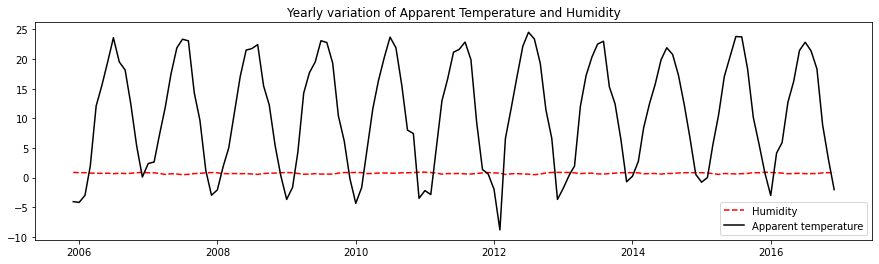

In [17]:
plt.figure(figsize = (15,4))
plt.plot(df1['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(df1['Apparent Temperature (C)'], label = 'Apparent temperature', color= 'black')
plt.title('Yearly variation of Apparent Temperature and Humidity')
plt.legend(loc= 0)
plt.show()

### Apparent Temperature and Humidity for the month of January every year

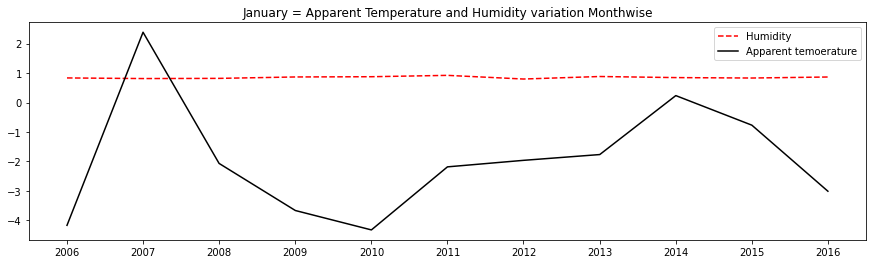

In [16]:
jan=df1[df1.index.month ==1]
plt.figure(figsize= (15,4))
plt.plot(jan['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(jan['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('January = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of February every year

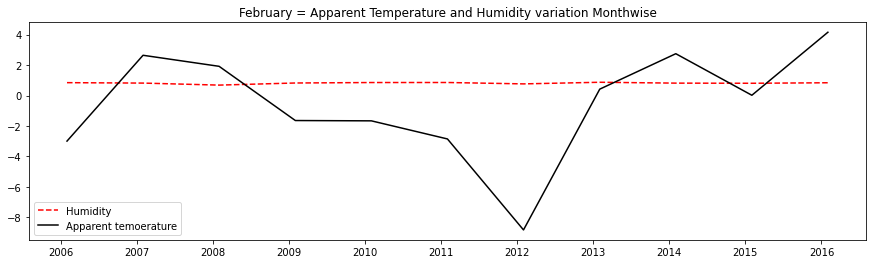

In [26]:
feb=df1[df1.index.month ==2]
plt.figure(figsize= (15,4))
plt.plot(feb['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(feb['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('February = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of March every year

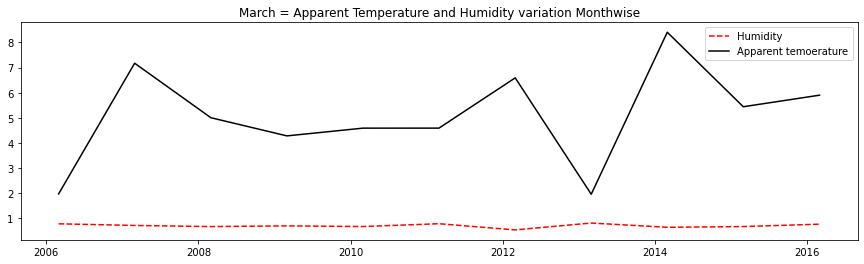

In [27]:
mar=df1[df1.index.month ==3]
plt.figure(figsize= (15,4))
plt.plot(mar['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(mar['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('March = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of April every year

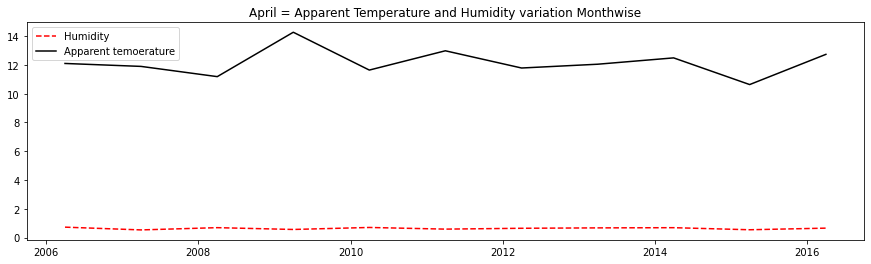

In [28]:
apr=df1[df1.index.month ==4]
plt.figure(figsize= (15,4))
plt.plot(apr['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(apr['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('April = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of May every year

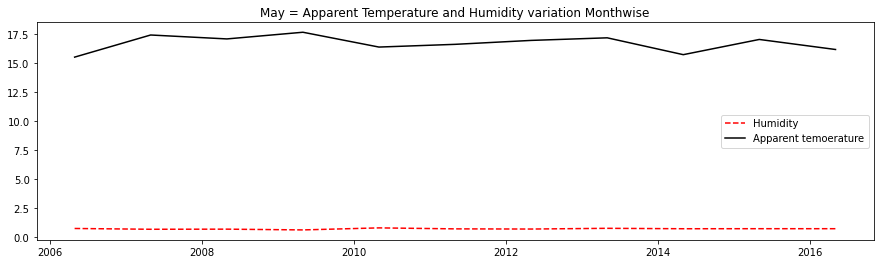

In [29]:
may=df1[df1.index.month ==5]
plt.figure(figsize= (15,4))
plt.plot(may['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(may['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('May = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of June every year

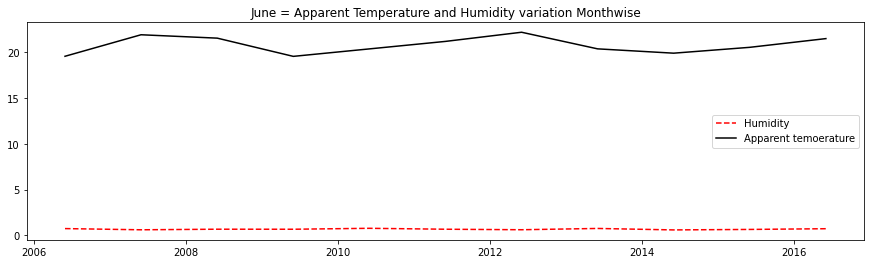

In [30]:
jun=df1[df1.index.month ==6]
plt.figure(figsize= (15,4))
plt.plot(jun['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(jun['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('June = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of July every year

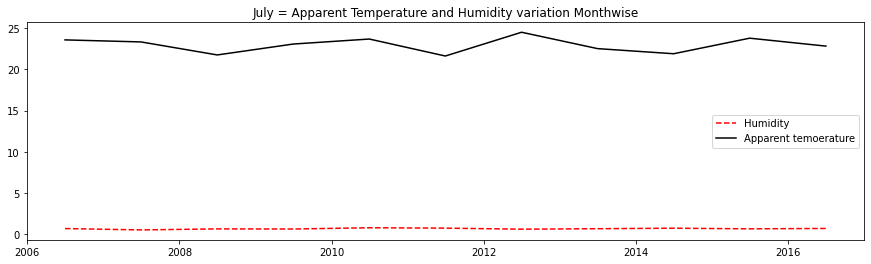

In [31]:
jul=df1[df1.index.month ==7]
plt.figure(figsize= (15,4))
plt.plot(jul['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(jul['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('July = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of August every year

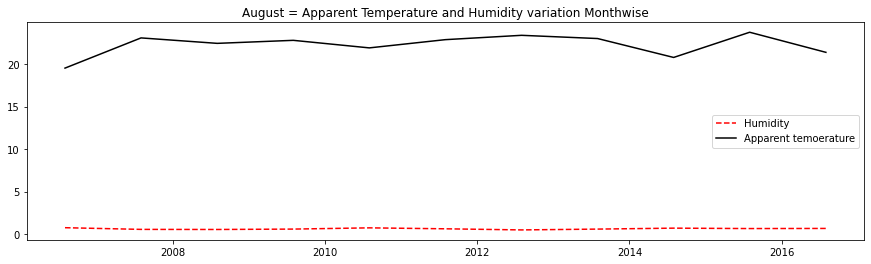

In [32]:
aug=df1[df1.index.month ==8]
plt.figure(figsize= (15,4))
plt.plot(aug['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(aug['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('August = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of September every year

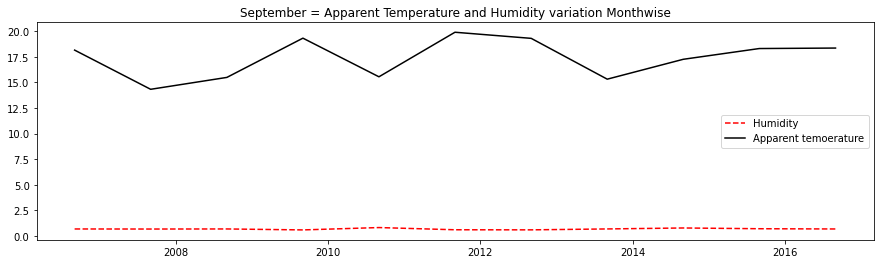

In [15]:
sep=df1[df1.index.month ==9]
plt.figure(figsize= (15,4))
plt.plot(sep['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(sep['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('September = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of October every year

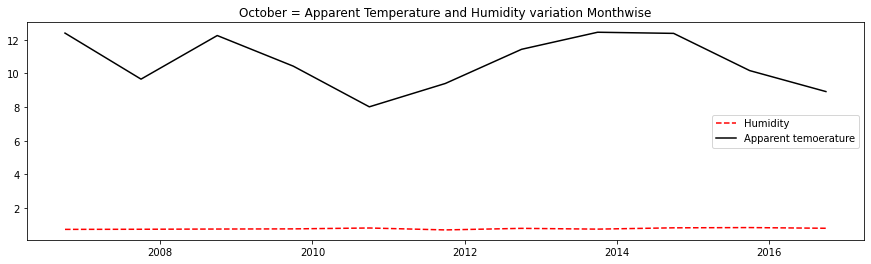

In [33]:
oct=df1[df1.index.month ==10]
plt.figure(figsize= (15,4))
plt.plot(oct['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(oct['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('October = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of November every year

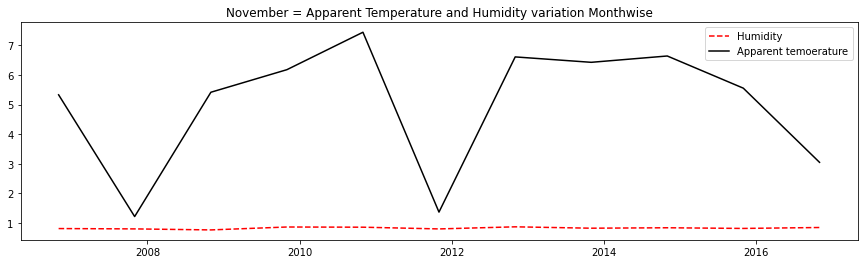

In [34]:
nov=df1[df1.index.month ==11]
plt.figure(figsize= (15,4))
plt.plot(nov['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(nov['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('November = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Apparent Temperature and Humidity for the month of December every year

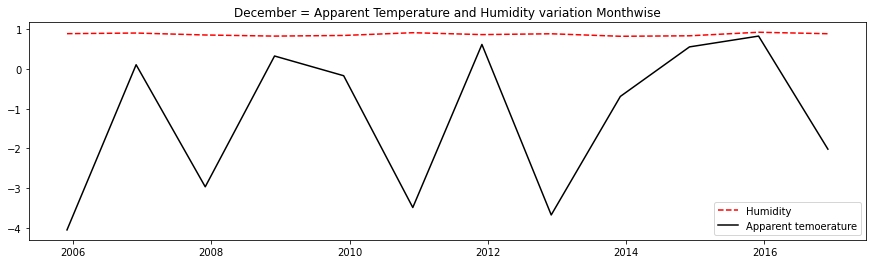

In [36]:
dec=df1[df1.index.month ==12]
plt.figure(figsize= (15,4))
plt.plot(dec['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(dec['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('December = Apparent Temperature and Humidity variation Monthwise')
plt.legend(loc= 0)

### Line Plot Visualization

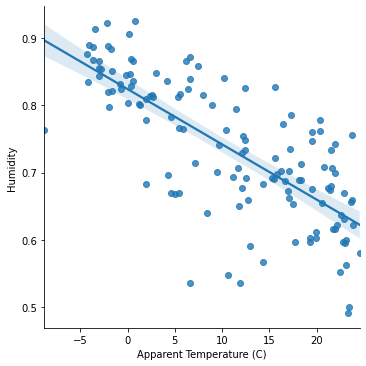

In [37]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=df1)
plt.show()

### Heat Map 

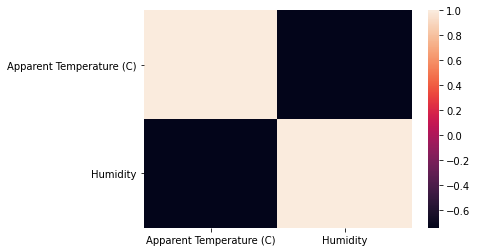

In [38]:
corr = df1.corr()
sns.heatmap(corr)

### Distribution Plot

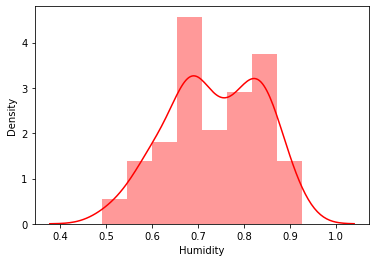

In [39]:
sns.distplot(df1.Humidity,color='red')


### Performing t test On Apparent temperature and  humidity

In [40]:
a=df1['Apparent Temperature (C)']
b=df1['Humidity']
test=stats.ttest_rel(a,b)
pvalue=test[1]
print(pvalue)

6.686806828886333e-24


In [41]:
if pvalue > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis
